In [92]:
import pandas as pd
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [102]:
original_df = pd.read_csv('/Users/wudailing/Desktop/US Ignite/trips.csv')
header_df = pd.read_csv('/Users/wudailing/Desktop/US Ignite/TripBulkReportTripsHeaders.csv')
trips_df = pd.concat([original_df,header_df])

In [103]:
trips_df.head()

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,MovementType,OriginCbg,DestCbg,StartTimezone,EndTimezone,WaypointFreqSec,StartQk,EndQk,Unnamed: 31,Unnamed: 32
0,a939d5d8c9b52b5265161bfa93054f0a,0006da8402c807c4be339cab03f9d498,d07e70efcfab08731a97e7b91be644de,1,2022-05-11T20:19:31.000Z,3,2022-05-11T20:22:52.000Z,3,30.18252,-96.93443,...,1,NaN,NaN,America/Chicago,America/Chicago,NaN,23130100000000000.0,23130100000000000.0,NaN,NaN
1,88180c2feb14c8520f169e4bda526313,009ef4b15eadd773468cd2bfdff6eb54,74071a673307ca7459bcf75fbd024e09,1,2022-05-14T21:07:54.000Z,6,2022-05-14T21:58:03.000Z,6,38.27969,-104.52873,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101200000000000.0,23101200000000000.0,"{\method\"":\""fused\""","\""aid_type\"":\""AAID\""}"""
2,a4d0936eb3b45ff1a5af8885939fbcd5,011dbfd3e177545535328ba48377522f,74071a673307ca7459bcf75fbd024e09,0,2022-05-13T21:40:44.000Z,5,2022-05-13T21:48:42.000Z,5,38.75461,-104.78828,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101200000000000.0,23101200000000000.0,"{\method\"":\""fused\""","\""aid_type\"":\""AAID\""}"""
3,a04c70dd5a17f8f54b7a5576951da0c5,014b33b72b76a3ba8cbb621009408974,d07e70efcfab08731a97e7b91be644de,1,2022-05-11T23:37:31.000Z,3,2022-05-11T23:47:49.000Z,3,38.67639,-104.70588,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101200000000000.0,23101200000000000.0,NaN,NaN
4,509bba65db0e6495bb35e615f823350c,014ed4fc9ea19b744e0eb3a0b1d72bb1,74071a673307ca7459bcf75fbd024e09,1,2022-05-12T00:14:40.000Z,3,2022-05-12T00:37:38.000Z,3,38.55622,-104.64958,...,1,NaN,NaN,America/Denver,America/Denver,NaN,23101200000000000.0,23101200000000000.0,"{\method\"":\""gps\""","\""aid_type\"":\""IDFA\""}"""


In [4]:
trips_df.columns

Index(['TripId', 'DeviceId', 'ProviderId', 'Mode', 'StartDate', 'StartWDay',
       'EndDate', 'EndWDay', 'StartLocLat', 'StartLocLon', 'EndLocLat',
       'EndLocLon', 'GeospatialType', 'ProviderType', 'ProviderDrivingProfile',
       'VehicleWeightClass', 'ProbeSourceType', 'OriginZoneName',
       'DestinationZoneName', 'EndpointType', 'TripMeanSpeedKph',
       'TripMaxSpeedKph', 'TripDistanceMeters', 'MovementType', 'OriginCbg',
       'DestCbg', 'StartTimezone', 'EndTimezone', 'WaypointFreqSec', 'StartQk',
       'EndQk', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [94]:
number_of_dup = len(trips_df[trips_df.duplicated(subset=list(trips_df.columns).remove('TripId')) == True])

print('Number of rows in original data:', len(trips_df))
print('Number of duplicated rows : ',number_of_dup)

Number of rows in original data: 136880
Number of duplicated rows :  0


In [95]:
# creating a geometry column 
trips_df['Startlocation'] = list(zip(trips_df.StartLocLat, trips_df.StartLocLon))
trips_df['Startlocation'] = trips_df['Startlocation'].apply(Point)

trips_df['Endlocation'] = list(zip(trips_df.EndLocLat, trips_df.EndLocLon))
trips_df['Endlocation'] = trips_df['Endlocation'].apply(Point)


# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(trips_df, crs=crs)

In [104]:
gdf.head()

,TripId,DeviceId,ProviderId,Mode,StartDate,StartWDay,EndDate,EndWDay,StartLocLat,StartLocLon,...,DestCbg,StartTimezone,EndTimezone,WaypointFreqSec,StartQk,EndQk,Unnamed: 31,Unnamed: 32,Startlocation,Endlocation
0,a939d5d8c9b52b5265161bfa93054f0a,0006da8402c807c4be339cab03f9d498,d07e70efcfab08731a97e7b91be644de,1,2022-05-11T20:19:31.000Z,3,2022-05-11T20:22:52.000Z,3,30.18252,-96.93443,...,NaN,America/Chicago,America/Chicago,NaN,2.313010e+16,2.313010e+16,NaN,NaN,POINT (30.18252 -96.93443),POINT (30.18015 -96.91383)
1,88180c2feb14c8520f169e4bda526313,009ef4b15eadd773468cd2bfdff6eb54,74071a673307ca7459bcf75fbd024e09,1,2022-05-14T21:07:54.000Z,6,2022-05-14T21:58:03.000Z,6,38.27969,-104.52873,...,NaN,America/Denver,America/Denver,NaN,2.310120e+16,2.310120e+16,"{\method\"":\""fused\""","\""aid_type\"":\""AAID\""}""",POINT (38.27969 -104.52873),POINT (38.34004 -104.67292)
2,a4d0936eb3b45ff1a5af8885939fbcd5,011dbfd3e177545535328ba48377522f,74071a673307ca7459bcf75fbd024e09,0,2022-05-13T21:40:44.000Z,5,2022-05-13T21:48:42.000Z,5,38.75461,-104.78828,...,NaN,America/Denver,America/Denver,NaN,2.310120e+16,2.310120e+16,"{\method\"":\""fused\""","\""aid_type\"":\""AAID\""}""",POINT (38.75461 -104.78828),POINT (38.74819 -104.78828)
3,a04c70dd5a17f8f54b7a5576951da0c5,014b33b72b76a3ba8cbb621009408974,d07e70efcfab08731a97e7b91be644de,1,2022-05-11T23:37:31.000Z,3,2022-05-11T23:47:49.000Z,3,38.67639,-104.70588,...,NaN,America/Denver,America/Denver,NaN,2.310120e+16,2.310120e+16,NaN,NaN,POINT (38.67639 -104.70588),POINT (38.73319 -104.77867)
4,509bba65db0e6495bb35e615f823350c,014ed4fc9ea19b744e0eb3a0b1d72bb1,74071a673307ca7459bcf75fbd024e09,1,2022-05-12T00:14:40.000Z,3,2022-05-12T00:37:38.000Z,3,38.55622,-104.64958,...,NaN,America/Denver,America/Denver,NaN,2.310120e+16,2.310120e+16,"{\method\"":\""gps\""","\""aid_type\"":\""IDFA\""}""",POINT (38.55622 -104.64958),POINT (38.2193 -104.6537)


In [96]:
# exclude data whose ProviderType == Fleet
gdf = gdf[gdf['ProviderType']==1] 

## Number of Device

In [97]:
device_number = len(gdf['DeviceId'].unique())
print('Number of Device :',device_number)

Number of Device : 68188


## walk vs. vehicle

[Text(0, 0, 'Walk'), Text(1, 0, 'Vehicle'), Text(2, 0, 'Unknown')]

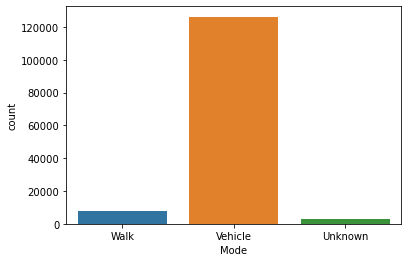

In [90]:
count_plot = sns.countplot(gdf['Mode'])
count_plot.set_xticklabels(['Walk','Vehicle','Unknown']) 

## vehicle type

[Text(0, 0, 'Consumer Vehicles')]

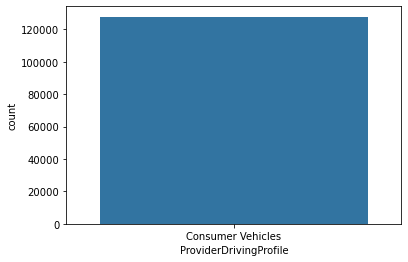

In [98]:
Driving_profile = sns.countplot(gdf['ProviderDrivingProfile'])
Driving_profile.set_xticklabels(['Consumer Vehicles']) 

[Text(0, 0, 'Light Duty Truck')]

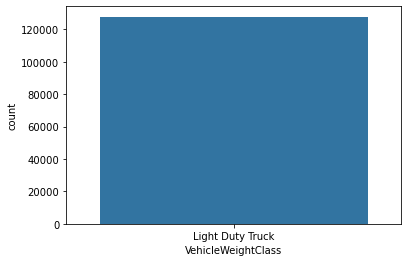

In [99]:
vehicle_weight_count = sns.countplot(gdf['VehicleWeightClass'])
vehicle_weight_count.set_xticklabels(['Light Duty Truck']) 

## Spatial heatmap of trips with origin on Fort Carson